# Laboratorium 7
Piotr Kuchta, Sebastian Soczawa

Importujemy niezbędne biblioteki

In [15]:
import numpy as np
import scipy.integrate as integrate
from math import pi as PI
from math import log
import matplotlib.pyplot as plt
import sys
from collections.abc import Iterable

Definiujemy funkcję odpowiedzialną za obliczanie wartości całki za pomocą kwadratur prostokątów. 

In [16]:
def integrate_rectangle(f, start, end, no_points):
    i = start
    output = 0.0
    interval = (end - start)/ no_points
    while i < end:
        output += interval*f(i+interval/2) if i + interval < end else (end-i)*f(i+interval/2)
        i += interval
    return output

Definiujemy dodatkową funkcję pomocniczą, która za zadanie ma obliczać wartość całki wszystkimi wymaganymi metodami, a następnie pokazywanie ich na wykresie

In [17]:
def integrate_f(f, rval):
    n = 26
    y_M = np.zeros(n)
    y_T = np.zeros(n)
    y_S = np.zeros(n)
    err_M = []
    err_T = []
    err_S = []
    hs = np.empty(n)
    for m in range(1, n):
        x_space = np.linspace(0, 1, 2**m + 1)
        y_space = np.array([f(x) for x in x_space])
        hs[m] = ( 1/(2**m+1))
        y_M[m] = integrate_rectangle(f, 0, 1, 2**m + 1)
        y_T[m] = integrate.trapz(y_space, x_space)
        y_S[m] = integrate.simps(y_space, x_space)
        err_M.append((abs(rval - y_M[m])/abs(rval)))
        err_T.append((abs(rval - y_T[m])/abs(rval)))
        err_S.append((abs(rval - y_S[m])/abs(rval)))
    th_mid = log(err_M[6]/err_M[4])/log(hs[6]/hs[4])
    th_tra = log(err_T[6]/err_T[4])/log(hs[6]/hs[4])
    th_sim = log(err_S[6]/err_S[4])/log(hs[6]/hs[4])
    print("Rząd zbieżności empiryczny - prostokąty", round(th_mid, 2))
    print("Rząd zbieżności empiryczny - trapezy", round(th_tra, 2))
    print("Rząd zbieżności empiryczny - Simpson", round(th_sim, 2))
    hmin_m = hs[err_M.index(min(err_M))]
    hmin_t = hs[err_T.index(min(err_T))]
    hmin_s = hs[err_S.index(min(err_S))]
    print("hmin - prostokąty", "{:.3}".format(hmin_m))
    print("hmin - trapezy", "{:.3}".format(hmin_t))
    print("hmin - Simpson", "{:.3}".format(hmin_s))

    n = 16
    err_GL = np.empty(n-1)
    n_space = np.empty(n-1)
    for m in range(1, n):
        err_GL[m-1] = (abs(integrate.fixed_quad(f, 2.2250738585072014e-308, 1, n=2**m+1)[0] - rval)/(abs(rval)))
        n_space[m-1] = m

    n = 15
    y_AT = np.empty(n)
    y_AG = np.empty(n)
    err_AT = np.empty(n)
    err_AG = np.empty(n)
    for m in range(n):
        x_space = np.linspace(0, 1, 2**m + 1)
        tol = 10**-m
        y_AT[m],_ = integrate.quad_vec(f,0,1,epsrel=tol,quadrature='trapezoid')
        y_AG[m],_ = integrate.quad_vec(f,0,1,epsrel=tol,quadrature='gk21')
        err_AG[m] = abs(y_AG[m] - rval)/abs(rval)
        err_AT[m] = abs(y_AT[m] - rval)/abs(rval)

    x_26 = [i for i in range(25)]
    x_15 = [i for i in range(15)]

    plt.plot(x_26, err_M, label="Prostokąty")
    plt.plot(x_26, err_T, label="Trapezy")
    plt.plot(x_26, err_S, label="Simpson")
    plt.plot(x_15, err_GL, label="Gauss-Legendre")
    plt.plot(x_15, err_AT, label="Adaptacyjne trapezy")
    plt.plot(x_15, err_AG, label="Adaptacyjne Gauss-Kronrod")
    plt.semilogy()
    plt.legend()

Następnie definiujemy odpowiednie funkcje zwracające wartości całkowanych funkcji oraz wywołujemy dla każdej z nich funkcję integrate_f

# Funkcja $\frac{4}{1+x^2}$

In [18]:
def f1(x):
    return 4/(1 + x*x)

Rząd zbieżności empiryczny - prostokąty 2.03
Rząd zbieżności empiryczny - trapezy 2.07
Rząd zbieżności empiryczny - Simpson 6.21
hmin - prostokąty 4.77e-07
hmin - trapezy 2.38e-07
hmin - Simpson 0.00775


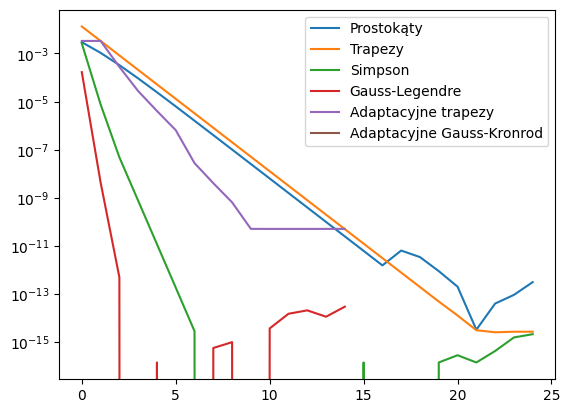

In [19]:
integrate_f(f1,PI)

# Funkcja $\sqrt{x}\log{x}$

In [20]:
def f2(x):
    if not isinstance(x,Iterable) and x == 0:
        return 0
    return np.sqrt(x)*np.log(x)

Rząd zbieżności empiryczny - prostokąty 1.3
Rząd zbieżności empiryczny - trapezy 1.38
Rząd zbieżności empiryczny - Simpson 1.41
hmin - prostokąty 5.96e-08
hmin - trapezy 5.96e-08
hmin - Simpson 5.96e-08


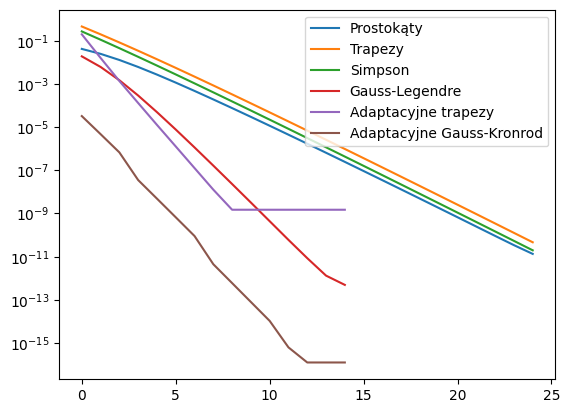

In [21]:
integrate_f(f2,-4/9)

# Funkcja $(\frac{1}{(x-0.3)^2+a}+\frac{1}{(x-0.9)^2+b}-6)$

In [22]:
def f3(x):
    return 1/((x-0.3)**2+0.001) + 1/((x-0.9)**2+0.004) - 6

Definiujemy funkcję pomocniczą zwracającą wartość wartość całki dla bieżąco analizowanej funkcji

In [23]:
def fkfun(x0,a):
    return (1/np.sqrt(a))*(np.arctan((1-x0)/np.sqrt(a))+np.arctan(x0/np.sqrt(a)))

Rząd zbieżności empiryczny - prostokąty 3.14
Rząd zbieżności empiryczny - trapezy 3.12
Rząd zbieżności empiryczny - Simpson 7.2
hmin - prostokąty 5.96e-08
hmin - trapezy 5.96e-08
hmin - Simpson 6.1e-05


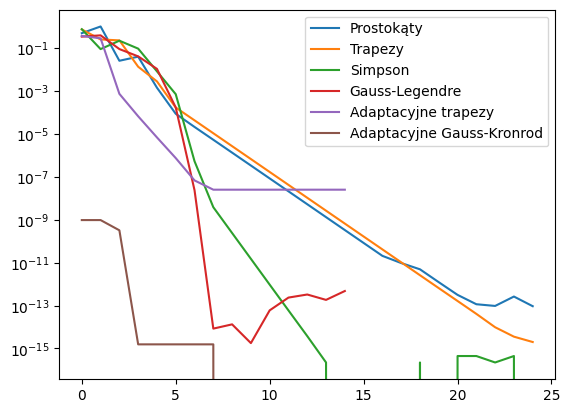

In [24]:
rval = fkfun(0.3,0.001) + fkfun(0.9,0.004) - 6
integrate_f(f3,rval)

# Wnioski
Z analizy wykresów wynika, że najszybciej do prawidłowego wyniku zbiega kwadratura adaptacyjna Gaussa-Kronroda. Kwadratura adaptacyjna trapezów równierz daje względnie poprawne wyniki, lecz wykres jej błędu względnego szybko się wypłaszcza. Kwadratura Gaussa-Legendre'a również szybko zbiega do właściwego wyniku.

W porównaniu z innymi badanymi funkcjami, dla funkcji $\sqrt{x}\log{x}$ wszystkie użyte metody całkowania zbiegają do prawidłowego wyniku dość powoli. Szczególnie zaskakujący jest fakt, że kwadratura Simpsona, której rzeczywisty rząd zbieżności jest zazwyczaj wyższy od rzędów zbierzności metod kwadratów i prostokątów, w tym przypadku radzi sobie porównywalnie do nich.